#Rent, Inflation and Salaries

##Rents, Rents, and More Rents

The first thing to consider when moving is to assess the cost of living, rent, taxes, and the minimum wage. In this next analysis, government data from Canada will be examined to provide a better understanding of how much life costs there and which Province/City might be more suitable for relocation.

This analysis will be focused on the province of Ontario, as it emerged as the province with the highest number of jobs and a significant population of graduates from its higher education institutions in other analyses.

The analysis will primarily focus on the year 2019.

If you wish to explore the other analyses, please refer to the provided "https://github.com/Yaelllll/Portfolio_Data"

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [202]:
df_rent = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/6. Rents-Inflation Canada/Dataset_rent_K/Canada_1Bed_rent.csv')

In [203]:
df_rent

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,458,451,462,479,488,499,492,497,...,687,716,754,768,804,819,809,819,850,852
1,Charlottetown,Prince Edward Island,367,369,384,390,393,418,416,415,...,610,641,658,679,696,718,750,770,793,834
2,Cape Breton,Nova Scotia,308,317,343,343,377,405,395,402,...,568,593,614,651,637,643,652,677,710,713
3,Halifax,Nova Scotia,438,453,467,485,507,506,511,512,...,758,778,788,807,840,851,887,910,968,1023
4,Campbellton,New Brunswick part,F,308,317,324,339,342,349,345,...,453,452,464,464,479,495,506,513,535,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Nanaimo,British Columbia,296,322,363,425,450,465,484,498,...,662,666,687,701,725,761,809,887,947,1011
57,Vancouver,British Columbia,441,472,526,566,587,596,614,626,...,965,983,1006,1040,1080,1161,1226,1309,1385,1418
58,Victoria,British Columbia,379,399,440,488,525,544,560,569,...,819,827,832,848,866,911,990,1080,1133,1192
59,Whitehorse,Yukon,..,..,..,..,..,..,..,..,...,F,F,F,F,F,F,F,F,F,F


In [204]:
for year in range(1987, 2021):
    df_rent[str(year)] = df_rent[str(year)].apply(lambda x: int(x) if x.isnumeric() else 0)

In [205]:
df_rent.head(3)

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,458,451,462,479,488,499,492,497,...,687,716,754,768,804,819,809,819,850,852
1,Charlottetown,Prince Edward Island,367,369,384,390,393,418,416,415,...,610,641,658,679,696,718,750,770,793,834
2,Cape Breton,Nova Scotia,308,317,343,343,377,405,395,402,...,568,593,614,651,637,643,652,677,710,713


In [206]:
df_rent_2019 = df_rent[['City','Province', '2019']]

##Average Rent Cost by Province
The following graph displays an average rental cost across all provinces in Canada. The graph is organized so that the provinces are shown in ascending order of cost.

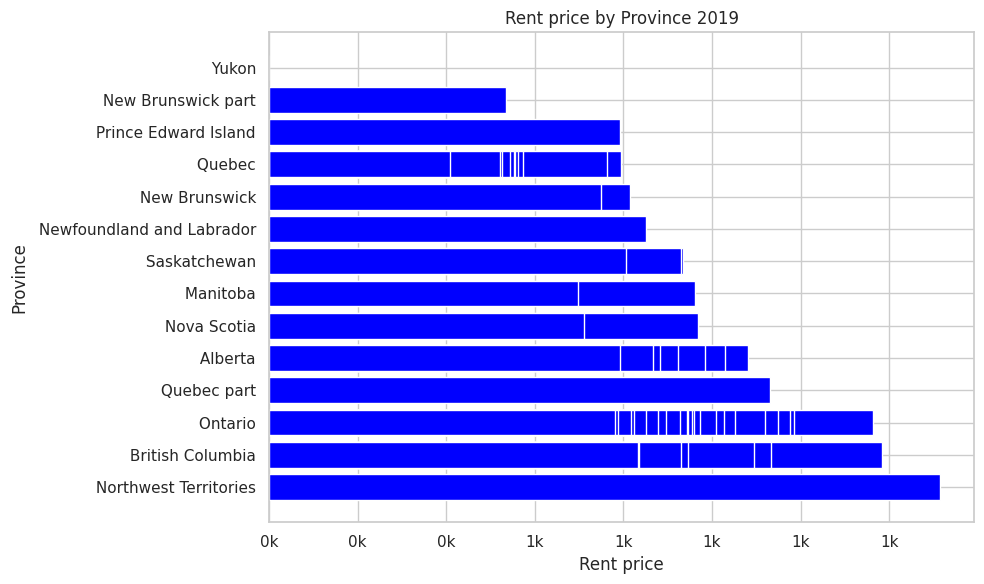

In [207]:
df_sorted = df_rent_2019.sort_values(by='2019', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Province'], df_sorted['2019'], color='blue')
plt.xlabel('Rent price')
plt.ylabel('Province')
plt.title('Rent price by Province 2019')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

plt.tight_layout()

plt.show()

##Average Rent Cost by City within Ontario
After that general overview, we will delve into more detail within the province of Ontario, as it is the province of interest as mentioned earlier.

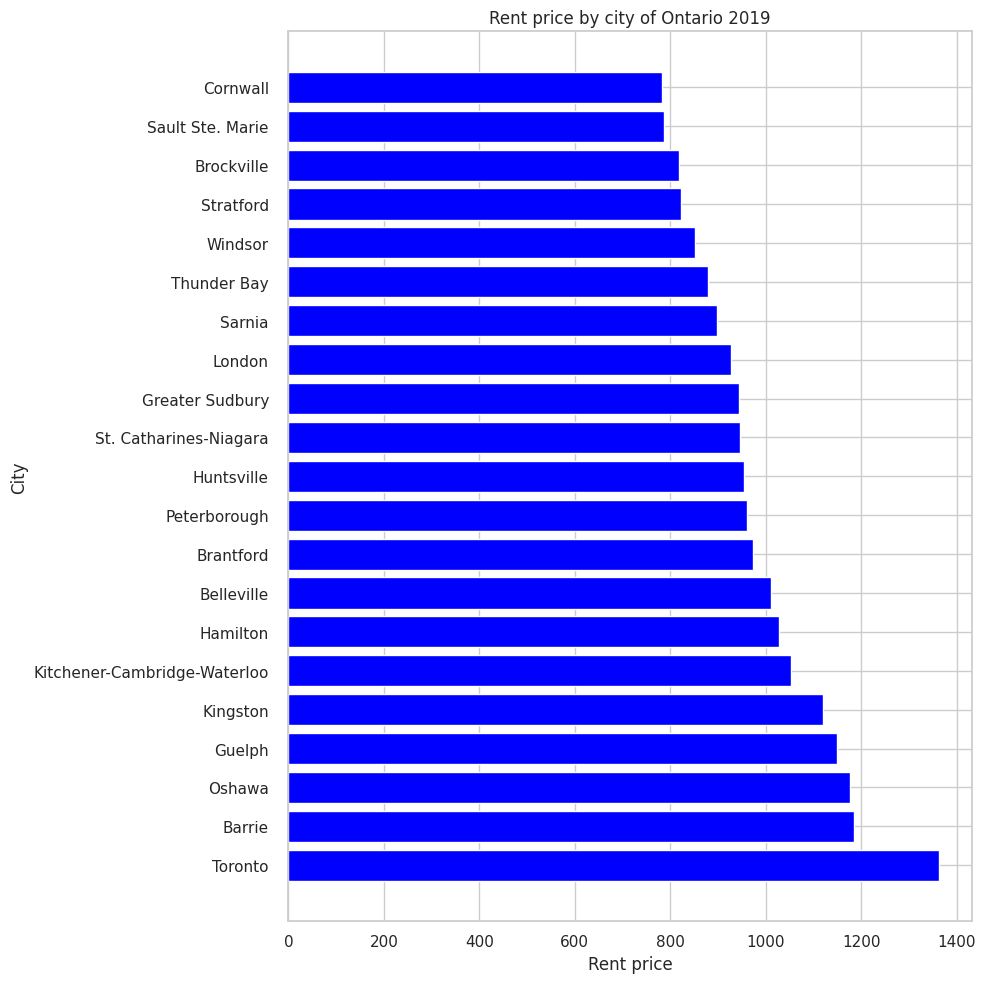

In [208]:
df_rent_Ontario = df_rent_2019[df_rent_2019['Province'] == " Ontario"].sort_values(by='2019', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(df_rent_Ontario['City'], df_rent_Ontario['2019'], color='blue')
plt.xlabel('Rent price')
plt.ylabel('City')
plt.title('Rent price by city of Ontario 2019')
plt.gca().yaxis.set_tick_params(pad=8)

plt.tight_layout()

plt.show()

As can be observed, there is a significant difference in rental costs between the most affordable city and the most expensive city, with a difference of approximately $700, which is quite substantial.

##And what are we going to eat?

Now, an analysis will be conducted on the average hourly wage within each province of Canada, with a specific focus once again on the province of Ontario.

In [209]:
df_salary = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/6. Rents-Inflation Canada/wage_salary_2019.csv')

For the salary analysis, the population was segmented into three parts:

* Low_Wage_Salaire_Minium:
Refers to jobs/occupations within a **low salary** range.
* Median_Wage_Salaire_Median:
Refers to jobs/occupations within an **average salary** range.
* High_Wage_Salaire_Maximal:
Refers to jobs/occupations within a **high salary** range.

For this project, the average salary for each occupation will be used. This will provide a better and more realistic perspective.

In [210]:
df_salary = df_salary.drop(columns=['ER_Name_Nom_RE'])
df_salary = df_salary.drop(columns=['Revision_Date_Date_revision'])

from typing_extensions import NewType
replace_dict = {
    'AB': 'Alberta',
    'BC': 'British Columbia',
    'MB': 'Manitoba',
    'NB': 'New Brunswick',
    'NL': 'Newfoundland and Labrador',
    'NS': 'Nova Scotia',
    'ON': 'Ontario',
    'PE': 'Prince Edward Island',
    'QC': 'Quebec',
    'SK': 'Saskatchewan',
    'NW': 'Northwest Territories 1',
    'NU': 'Northwest Territories 2'

}

df_salary['Province'] = df_salary['Province'].replace(replace_dict)
df_salary = df_salary.dropna()


df_salary.head()

,Area,Province,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal
1,Legislators,Newfoundland and Labrador,44335.0,96129.0,155370.0
7,Legislators,Nova Scotia,26638.0,89651.0,143890.0
13,Legislators,New Brunswick,24219.0,76008.0,142341.0
19,Legislators,Quebec,26195.0,68237.0,129479.0
37,Legislators,Ontario,29557.0,70271.0,147964.0


In [211]:
df_salary = df_salary.sort_values(by='Median_Wage_Salaire_Median', ascending=False)
df_salary = df_salary.drop(columns=['Low_Wage_Salaire_Minium'])
df_salary = df_salary.drop(columns=['High_Wage_Salaire_Maximal'])

df_salary.head()

,Area,Province,Median_Wage_Salaire_Median
14325,Specialist physicians,Manitoba,331086.25
14282,Specialist physicians,Prince Edward Island,297423.93
14289,Specialist physicians,New Brunswick,286839.42
14277,Specialist physicians,Newfoundland and Labrador,276575.73
14313,Specialist physicians,Ontario,255357.98


In [212]:
df_salary_filtered = df_salary[df_salary['Median_Wage_Salaire_Median'] < 500]
df_salary_filtered = df_salary_filtered[df_salary_filtered['Province'] == "Ontario"]
df_salary_filtered = df_salary_filtered.drop(columns=['Province'])
df_salary_filtered.head()

,Area,Median_Wage_Salaire_Median
17753,Judges,144.08
17757,Judges,143.54
2360,Commissioned police officers,62.50
2359,Commissioned police officers,62.50
2363,Commissioned police officers,62.50


In [213]:
df_salary_grouped = df_salary_filtered.groupby('Area').mean()
df_salary_grouped.reset_index(inplace=True)
df_salary_grouped.rename(columns={'index': 'Area', 'Median_Wage_Salaire_Median':'SalaryPerHour'}, inplace=True)
df_salary_grouped['SalaryPerMonth'] = (((df_salary_grouped['SalaryPerHour']*8)*5)*4)
df_salary_grouped.head()

,Area,SalaryPerHour,SalaryPerMonth
0,Accommodation service managers,30.090000,4814.400000
1,"Accommodation, travel, tourism and related ser...",22.792500,3646.800000
2,Accounting and related clerks,21.489167,3438.266667
3,Accounting technicians and bookkeepers,22.472727,3595.636364
4,Administrative assistants,21.804167,3488.666667


Now that we have filtered, we are going to make a search of the average salary for an engineer/software developer (That's why I'm an engineer, so I'm focusing this analisis on that area)

In [214]:
#Uncoment this part to see the whole ocupations as a table
#If you want to see a different ocupation uncoment this lines and search for yours

#from tabulate import tabulate
#sorted_unique_areas = df_salary_grouped['Area'].sort_values()
#table = tabulate({"Unique Areas": unique_areas}, headers="keys", tablefmt="pretty")
#print(table)

In [215]:
#Computer programmers and interactive media developers
df_salary_grouped[df_salary_grouped['Area'] == "Computer programmers and interactive media developers"]

,Area,SalaryPerHour,SalaryPerMonth
74,Computer programmers and interactive media dev...,38.327,6132.32


In [216]:
#Software engineers and designers
df_salary_grouped[df_salary_grouped['Area'] == "Software engineers and designers"]

,Area,SalaryPerHour,SalaryPerMonth
401,Software engineers and designers,45.037,7205.92


##Let's Talk About Taxes and Inflation, Everyone's Poison

In Canada, taxes are levied based on each person's salary. Therefore, for this analysis, the following taxes were taken into consideration:

INDINF_CPI_M:

This refers to the Consumer Price Index Inflation, which represents the average cost of a basket of goods and services that consumers acquire for daily consumption.

INDINF_LOWTARGET:

This refers to the Index of taxes charged to the medium/low-income worker.

INDINF_UPPTARGET:

This refers to the Index of taxes charged to the high-income worker.

In [217]:
df_inflation = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/6. Rents-Inflation Canada/Dataset_inflation/CPI-INFLATION-sd-1993-01-01-ed-2022-01-01.csv')

In [218]:
df_inflation.head()

,date,INDINF_CPI_M,INDINF_LOWTARGET,INDINF_UPPTARGET
0,1/1/1993,2.0,1.972223,3.972223
1,2/1/1993,2.4,1.944445,3.944445
2,3/1/1993,1.9,1.916667,3.916667
3,4/1/1993,1.8,1.888890,3.888889
4,5/1/1993,1.9,1.861112,3.861111


In [219]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              349 non-null    object 
 1   INDINF_CPI_M      349 non-null    float64
 2   INDINF_LOWTARGET  349 non-null    float64
 3   INDINF_UPPTARGET  349 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.0+ KB


In [220]:
df_inflation['date'] = pd.to_datetime(df_inflation['date'])
df_inflation['year'] = df_inflation['date'].dt.year
df_inflation['average_tax'] = ((df_inflation['INDINF_CPI_M'] + df_inflation['INDINF_LOWTARGET'] + df_inflation['INDINF_UPPTARGET'])/3)
df_inflation.head()

,date,INDINF_CPI_M,INDINF_LOWTARGET,INDINF_UPPTARGET,year,average_tax
0,1993-01-01,2.0,1.972223,3.972223,1993,2.648149
1,1993-02-01,2.4,1.944445,3.944445,1993,2.762963
2,1993-03-01,1.9,1.916667,3.916667,1993,2.577778
3,1993-04-01,1.8,1.888890,3.888889,1993,2.525926
4,1993-05-01,1.9,1.861112,3.861111,1993,2.540741


In [221]:
df_inflation['year'] = df_inflation['year'].astype(str)
df_inflation_grouped = df_inflation.groupby('year').mean()
df_inflation['year'] = df_inflation['year'].astype(int)
df_inflation_grouped.reset_index(inplace=True)
df_inflation_grouped.rename(columns={'index': 'year', 'INDINF_CPI_M': 'INDINF_CPI_M' , 'INDINF_LOWTARGET' : 'INDINF_LOWTARGET' , 'INDINF_UPPTARGET' : 'INDINF_UPPTARGET'}, inplace=True)
df_inflation_grouped.tail()

<ipython-input-221-b952a5678b67>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_inflation_grouped = df_inflation.groupby('year').mean()


,year,INDINF_CPI_M,INDINF_LOWTARGET,INDINF_UPPTARGET,average_tax
25,2018,2.266667,1.0,3.0,2.088889
26,2019,1.941667,1.0,3.0,1.980556
27,2020,0.725000,1.0,3.0,1.575000
28,2021,3.400000,1.0,3.0,2.466667
29,2022,5.100000,1.0,3.0,3.033333


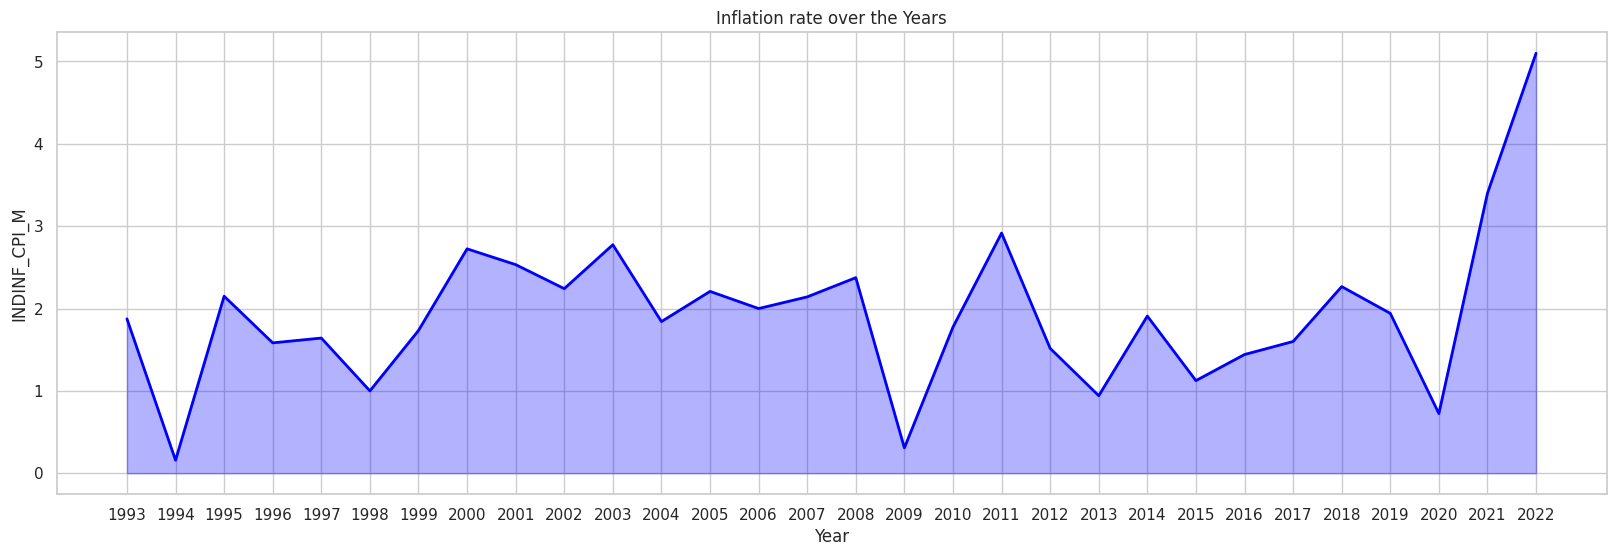

In [222]:
plt.figure(figsize=(20, 6))
plt.plot(df_inflation_grouped['year'], df_inflation_grouped['INDINF_CPI_M'], color='blue', linewidth=2)
plt.fill_between(df_inflation_grouped['year'], df_inflation_grouped['INDINF_CPI_M'], color='blue', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('INDINF_CPI_M')
plt.title('Inflation rate over the Years')
plt.grid(True)
plt.show()

As can be observed year after year, inflation continues to grow. This can be attributed to many factors; however, a very important one to consider in this analysis is that probably in the coming years, due to the recession and the pandemic, interest rates and inflation will rise or remain as they are. So, at least for a couple of years, they won't decrease.

Therefore, the calculations will be continued to assess how easy it would be to live.

<ipython-input-223-64fdb3439ba8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_inflation_grouped['INDINF_CPI_M'], color='blue', shade=True)


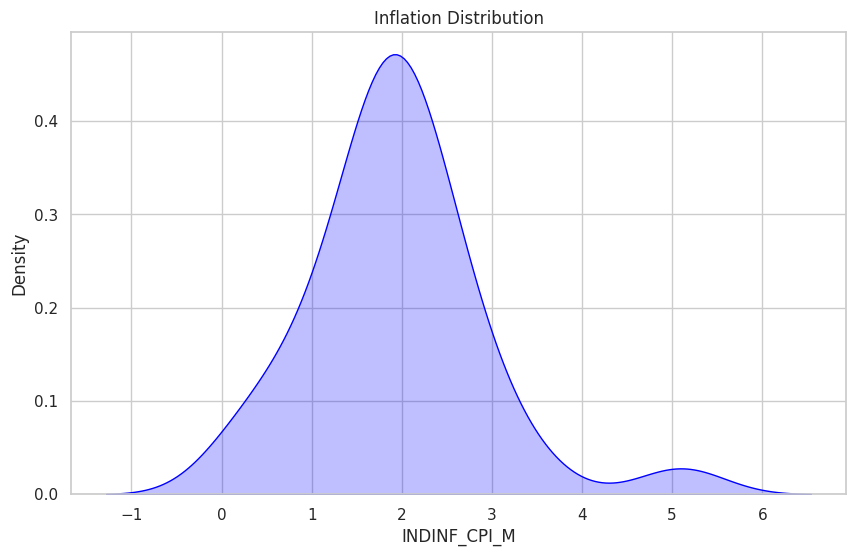

In [223]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_inflation_grouped['INDINF_CPI_M'], color='blue', shade=True)
plt.xlabel('INDINF_CPI_M')
plt.ylabel('Density')
plt.title('Inflation Distribution')
plt.grid(True)
plt.show()

<ipython-input-224-b930932e5d98>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_inflation.corr(method="pearson")


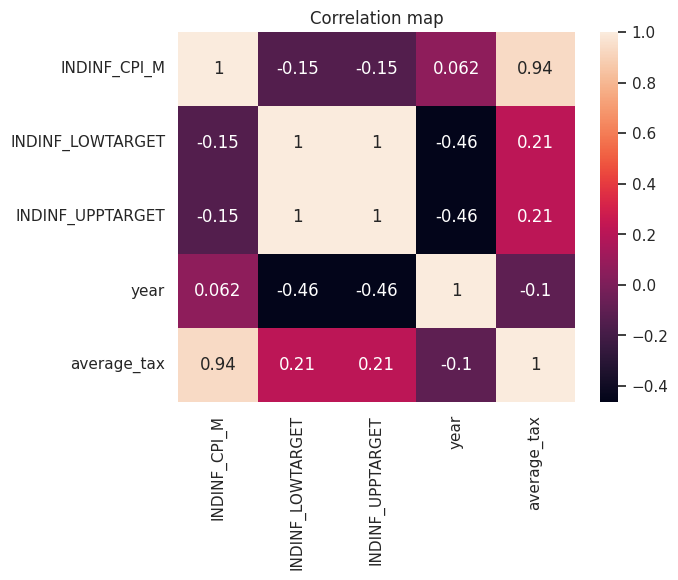

In [224]:
correlation = df_inflation.corr(method="pearson")
sns.heatmap(correlation,annot=True)
plt.title('Correlation map')
plt.show()

##In order to answer the question of how easy it would be to live in Canada in the province of Ontario, a table will be created for comparison:

Average salary by area after deducting average taxes

*   Expenses on services such as meals: $800

*   Cellphone plan or mobile data: $50

*   Presto Card (monthly pass): $150

*   Rent $ 1300

With this new info, I will create a new table to make an analisis for this.

In [225]:
average_spend = 800 + 50 + 150 + 1300
final = df_salary_grouped
final = final.drop(columns=['SalaryPerHour'])
#Taxes maths hhhhhhhhh
final['SalaryPerMonth'] = final['SalaryPerMonth'] * (1 - 0.205)
final['Money_Free'] = final['SalaryPerMonth'] - average_spend
final.head()

,Area,SalaryPerMonth,Money_Free
0,Accommodation service managers,3827.448000,1527.448000
1,"Accommodation, travel, tourism and related ser...",2899.206000,599.206000
2,Accounting and related clerks,2733.422000,433.422000
3,Accounting technicians and bookkeepers,2858.530909,558.530909
4,Administrative assistants,2773.490000,473.490000


In [226]:
def determine_die_live(value):
    if value > 1500:
        return "Good life"
    elif 1500 >= value > 1000:
        return "Enough to live"
    elif 1000 >= value > 500:
        return "Risky"
    elif 500 >= value > 0:
        return "Almost died"
    else:
        return "Died"

final['Die_Live'] = final['Money_Free'].apply(determine_die_live)

In [227]:
final.head(3)

,Area,SalaryPerMonth,Money_Free,Die_Live
0,Accommodation service managers,3827.448,1527.448,Above
1,"Accommodation, travel, tourism and related ser...",2899.206,599.206,Risky
2,Accounting and related clerks,2733.422,433.422,Almost died


<ipython-input-228-a92b5ad869f6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final, x='SalaryPerMonth', hue='Die_Live', shade=True)


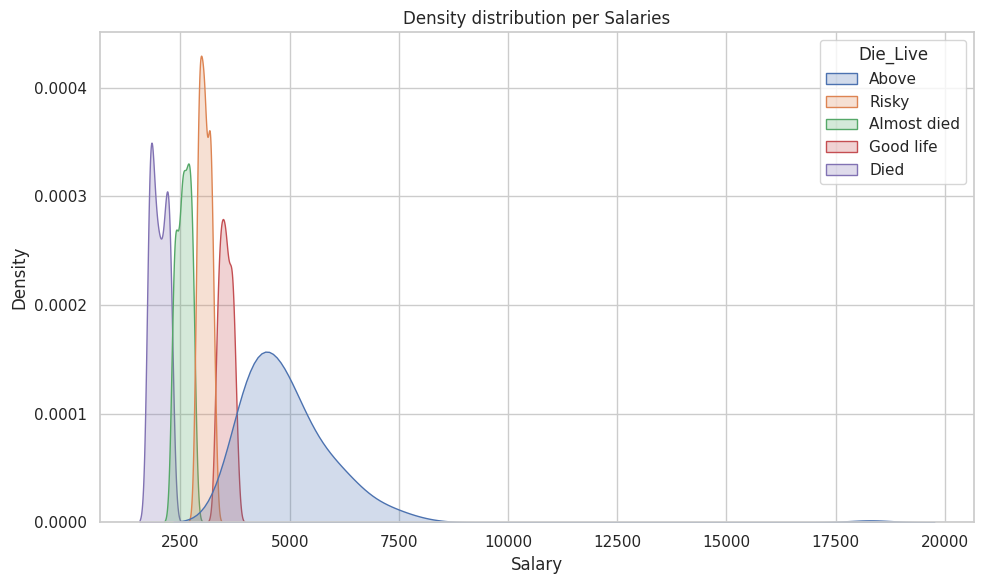

In [228]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final, x='SalaryPerMonth', hue='Die_Live', shade=True)
plt.title('Density distribution per Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

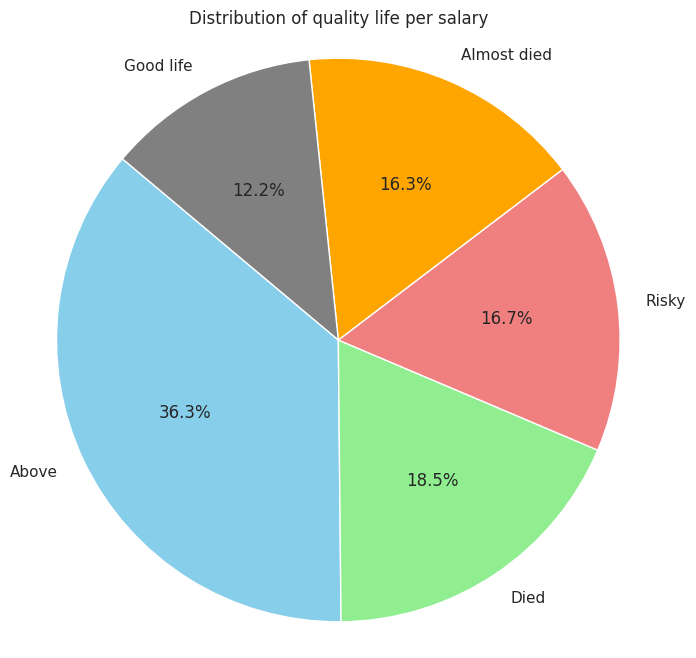

In [229]:
die_live_counts = final['Die_Live'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(die_live_counts, labels=die_live_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'gray'])
plt.axis('equal')
plt.title('Distribution of quality life per salary')
plt.show()


##Let's Be Realistic

At first glance, it appears that the majority of Canada's population enjoys a good quality of life. However, due to rapid urban growth and migration to Canada, the costs of living (rent and goods) have significantly surged. Additionally, as seen in the inflation graph, inflation is likely to remain high for a couple of years or potentially increase due to the recession.

Undoubtedly, the best option would be to consider relocating to a less densely populated city in Ontario that allows for maintaining a good quality of life.

On another note, if your plan is to move alone, there are several ways to make your stay more affordable, such as sharing an apartment.

Conversely, if your plan involves moving to Canada with your children, and you are the sole breadwinner, it will prove to be challenging and costly.

###Source:


Rent

*   https://www.kaggle.com/datasets/dplayer/rent-data-statcan-1987-2020

Inflation

*   https://www.kaggle.com/datasets/benjaminsmith/canada-inflation-rates-source-bank-of-canada
*   https://fred.stlouisfed.org/series/FPCPITOTLZGCAN


Minimum salary/wage:


*   https://open.canada.ca/data/en/dataset/adad580f-76b0-4502-bd05-20c125de9116

